# Repairing structures along an Ensemble

By repairing a structure:

- All incomplete sidechains will be completed.
- Residues with high energy will be self-mutated to try rotamers that minimize the energy.

To repair en ensemble of structures is as simple as call the *repair()* method. The *inPlace* parameter determines if the original ensemble will be overwritten with the repaired structures or a new ensemble will be created. By passing a list of residues in FoldX format to the *fixResidues* parameter these residues will not be taken into account for repair.

In [1]:
# This simulates the installation the user will just import pyFoldx.Ensemble
import sys
sys.path.append("/home/lradusky/Dropbox/workspacesbg/pyFoldX")

In [2]:
from src.structure.Ensemble import uniprotEnsemble

In [3]:
#Some other imports, to work with the data and to plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# We want to print full tables
pd.set_option("display.max_rows", 1000, "display.max_columns", 1000)
# We ignore warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

We will create a *UniprotEnsemble* object with high quality structures of the HRAS gene.

In [4]:
workingPath = "/home/lradusky/Downloads/P01112/ensemble.pdb"
t = uniprotEnsemble("P01112", workingPath, justXray=True, maxResolution=1.3)

Master Structure is 2CLD:
Aligning to master (total: 10)
100%|██████████| 9/9 [00:20<00:00,  2.31s/it]
Ensemble built
Total structures aligned: 5


Let's observe the energies of the loaded structures.

In [5]:
t.getTotalEnergy()

Computing total energy for ensemble...
  0%|          | 0/5 [00:00<?, ?it/s]

/home/lradusky/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100%|██████████| 5/5 [00:03<00:00,  1.45it/s]
Energy computed.


,total,backHbond,sideHbond,energy_VdW,electro,energy_SolvP,energy_SolvH,energy_vdwclash,entrop_sc,entrop_mc,sloop_entropy,mloop_entropy,cis_bond,energy_torsion,backbone_vdwclash,energy_dipole,water,disulfide,energy_kon,partcov,energyIonisation,entr_complex
2CL7_X,77.942203,-111.291695,-26.953664,-190.881336,-15.136992,281.258345,-247.234361,36.111585,103.132881,252.515900,0.0,0.0,0.0,6.527641,112.082936,-3.077530,0.0,0.0,0.0,-7.611298,0.582727,0.0
2CL6_X,69.754977,-113.582003,-32.399681,-192.621118,-12.502671,274.639621,-249.600677,38.270879,104.769843,249.038238,0.0,0.0,0.0,7.913739,109.842862,-1.504576,0.0,0.0,0.0,-3.418036,0.751419,0.0
2CLC_A,86.210158,-109.239725,-30.487225,-191.235770,-15.179351,283.635434,-247.338622,42.898409,102.940965,253.542080,0.0,0.0,0.0,7.520797,110.413926,-3.125417,0.0,0.0,0.0,-8.298718,0.577303,0.0
2CE2_A,62.999159,-111.746914,-33.116126,-198.368332,-14.268230,284.752122,-258.394913,34.122245,105.665929,250.639054,0.0,0.0,0.0,7.118098,114.654297,-1.258187,0.0,0.0,0.0,-2.302567,0.156981,0.0
2EVW_X,93.708451,-111.043142,-29.490715,-192.170180,-12.150174,279.613594,-247.666973,43.598583,103.598072,252.934674,0.0,0.0,0.0,13.366054,113.077846,-0.735763,0.0,0.0,0.0,-6.706163,0.560584,0.0


Now, let's repair all the structures within the ensemble and save it to a file. 

In [6]:
t.repair()
t.saveToPDB(workingPath+"repaired.pdb")

Repairing structures along ensemble...
  0%|          | 0/5 [00:00<?, ?it/s]

/home/lradusky/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100%|██████████| 5/5 [14:31<00:00, 174.30s/it]
Structures repaired.


And we can check that the energy of the structures was minimized.

In [7]:
t.getTotalEnergy()

Computing total energy for ensemble...
100%|██████████| 5/5 [00:02<00:00,  2.37it/s]
Energy computed.


,total,backHbond,sideHbond,energy_VdW,electro,energy_SolvP,energy_SolvH,energy_vdwclash,entrop_sc,entrop_mc,sloop_entropy,mloop_entropy,cis_bond,energy_torsion,backbone_vdwclash,energy_dipole,water,disulfide,energy_kon,partcov,energyIonisation,entr_complex
2CL7_X,4.504217,-123.348354,-50.344831,-190.315013,-16.605395,270.951108,-249.743412,12.687093,109.487850,249.322382,0.0,0.0,0.0,3.357786,111.370863,-3.517483,0.0,0.0,0.0,-8.053946,0.626432,0.0
2CL6_X,-12.732145,-124.332863,-64.641730,-195.849648,-14.660477,270.586603,-256.882988,8.138985,117.076586,247.960306,0.0,0.0,0.0,4.276946,110.024295,-1.816568,0.0,0.0,0.0,-3.348570,0.761272,0.0
2CLC_A,3.660839,-121.160984,-55.376229,-191.882464,-14.829451,272.612757,-251.905835,13.767865,112.639122,248.610332,0.0,0.0,0.0,3.068737,111.090189,-4.331412,0.0,0.0,0.0,-8.515588,0.963989,0.0
2CE2_A,-5.463645,-122.258972,-53.356968,-196.836139,-14.750115,270.625782,-259.708096,10.994861,108.610829,251.258035,0.0,0.0,0.0,3.947532,114.266943,-2.082534,0.0,0.0,0.0,-2.302567,0.394709,0.0
2EVW_X,-4.166644,-125.208867,-65.926981,-190.139632,-13.149581,266.570810,-247.851565,10.480025,113.523592,252.835014,0.0,0.0,0.0,3.440036,113.182427,-3.071856,0.0,0.0,0.0,-6.414828,0.747188,0.0


Computing residue energy for ensemble...
 20%|██        | 1/5 [00:00<00:01,  2.32it/s]

/home/lradusky/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100%|██████████| 5/5 [00:02<00:00,  2.41it/s]
Energy computed.


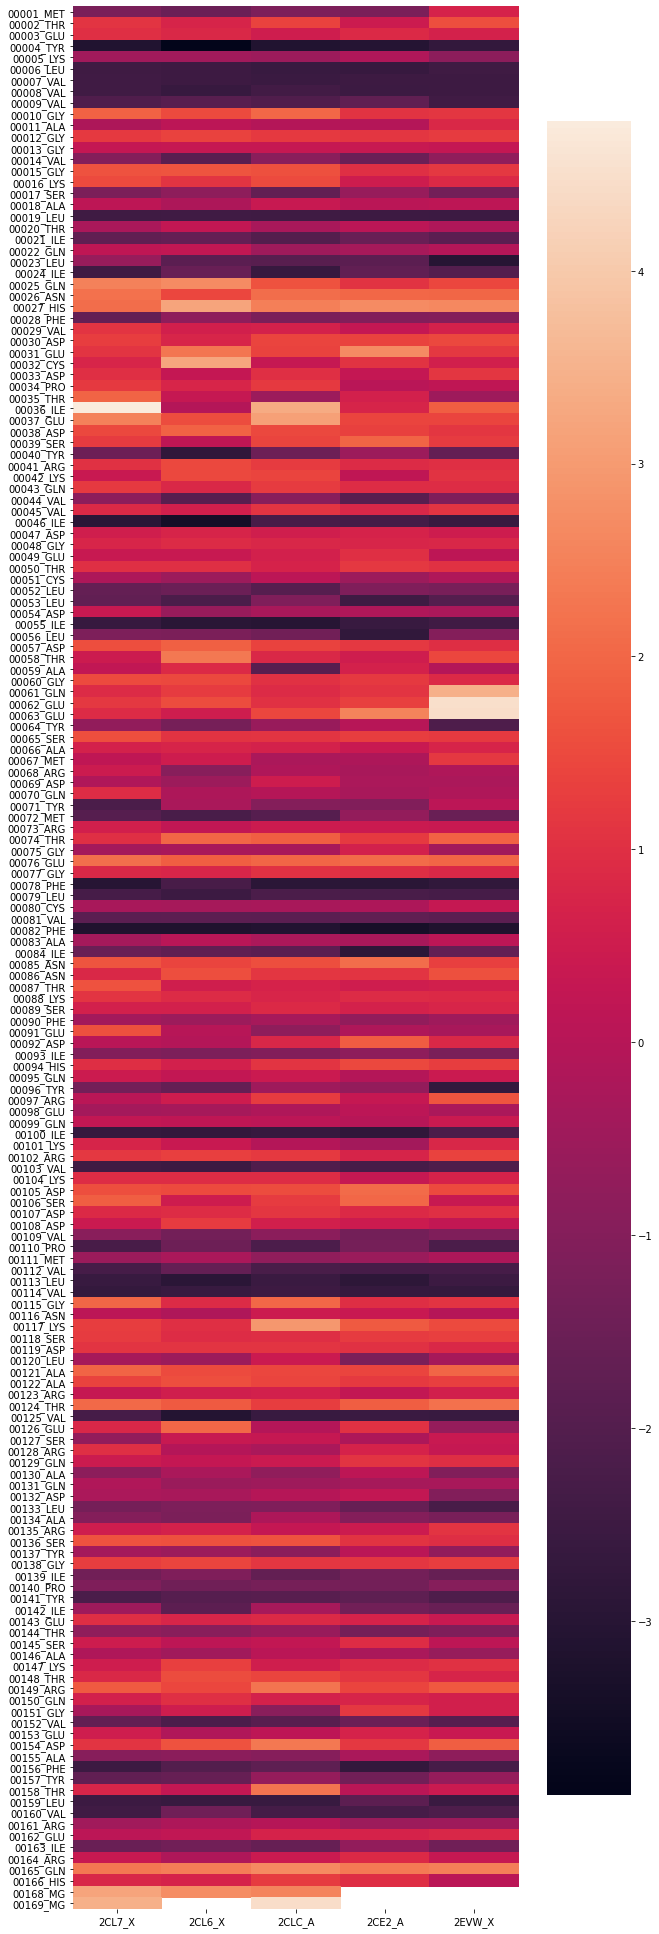

In [8]:
plt.figure(figsize=(10,35))
sns.heatmap(t.getResiduesEnergy())